# Rain in Australia
 https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## 1. Opis problemu
Przewidywanie deszczu następnego dnia poprzez trening modeli klasyfikacyjnych na zmiennej docelowej RainTomorrow.   
Ten zbiór danych zawiera około 10 lat codziennych obserwacji pogody z wielu miejsc w całej Australii.  
RainTomorrow jest zmienną docelową do przewidywania. Oznacza ona - czy padało następnego dnia, kolumna ta ma wartość Tak, jeśli deszcz tego dnia wyniósł 1mm lub więcej. Jest to model klasyfikacji binarnej,


<img src="https://www.worldatlas.com/r/w2560-q80/upload/08/4d/54/au-01.png" width="600" height="600" />

## 2. Dane 
Źródła danych, ocena ich wiarygodności
Krótka analiza opisowa danych
Uzasadnienie: w jaki sposób te dane mogą pomóc rozwiązać problem?


In [2]:
#Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="deep")

In [3]:
#Wczytanie danych i ustawienie daty jako indeksu
df = pd.read_csv("weatherAUS.csv")
df.Date = df.Date.astype(np.datetime64)
df.set_index('Date', inplace=True)
df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2013-05-01,Ballarat,3.8,13.2,0.0,NaN,NaN,WSW,50.0,W,SW,...,98.0,71.0,1022.7,1022.4,1.0,2.0,8.7,11.4,No,No
2014-04-21,Portland,11.9,21.0,2.0,2.2,1.4,NW,50.0,NNE,N,...,99.0,56.0,1015.1,1009.1,NaN,NaN,13.5,19.8,Yes,Yes
2009-05-02,Townsville,18.8,29.5,0.0,8.0,7.8,ENE,41.0,SE,ENE,...,59.0,55.0,1018.0,1014.6,5.0,7.0,25.7,27.1,No,No
2009-08-20,Sydney,9.9,21.1,0.0,2.8,4.9,NaN,NaN,W,E,...,74.0,58.0,1019.5,1014.2,7.0,2.0,12.2,19.0,No,No
2011-12-14,Mildura,11.0,27.2,0.0,9.8,11.3,SE,33.0,SE,W,...,44.0,15.0,1018.2,1015.1,1.0,3.0,15.7,25.2,No,No


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [5]:
print(f"Mamy {df.Location.unique().size} lokacji do wyboru")
print(sorted(df.Location.unique()))

Mamy 49 lokacji do wyboru
['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']


In [6]:
#Jako lokację wybieram Darwin na północy Australii, później można to zmienić podmieniając wartość
location_df = df.query("Location == 'Darwin'")

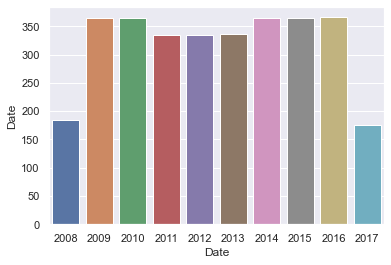

In [7]:
#Dane zaczynają się w roku 2008, a kończą w 2017. Widać, że brakuje części dat między 2011-2013
sns.barplot(y=location_df.index.year.value_counts().sort_index(), \
            x=location_df.index.year.unique().sort_values()); 

Mamy do czynienia z niezbalansowaną wielkością klas.
Można by użyć technik do wyrównania zbiorów danych takich jak oversampling, ale nie mówiliśmy o tym na zajęciach, więc pominę ten krok.
Natomiast trzeba będzie użyć stratyfikacji przy train-test split.

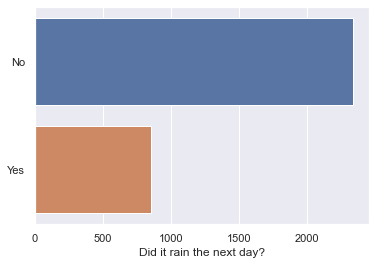

In [8]:
sns.barplot(x=location_df.RainTomorrow.value_counts(), y=location_df.RainTomorrow.value_counts().index);
plt.xlabel("Did it rain the next day?");

In [9]:
location_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3193 entries, 2008-07-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       3193 non-null   object 
 1   MinTemp        3192 non-null   float64
 2   MaxTemp        3192 non-null   float64
 3   Rainfall       3193 non-null   float64
 4   Evaporation    3139 non-null   float64
 5   Sunshine       3189 non-null   float64
 6   WindGustDir    3147 non-null   object 
 7   WindGustSpeed  3151 non-null   float64
 8   WindDir9am     3165 non-null   object 
 9   WindDir3pm     3190 non-null   object 
 10  WindSpeed9am   3191 non-null   float64
 11  WindSpeed3pm   3191 non-null   float64
 12  Humidity9am    3192 non-null   float64
 13  Humidity3pm    3191 non-null   float64
 14  Pressure9am    3192 non-null   float64
 15  Pressure3pm    3191 non-null   float64
 16  Cloud9am       3192 non-null   float64
 17  Cloud3pm       3190 non-null   flo

In [10]:
#Pozbywam się brakującej wartości dla zmiennej objaśnianej
location_df = location_df.dropna(subset=['RainTomorrow'])

In [11]:
#Pozbywam się kolumny lokacja, ponieważ posiada tylko jedną wartość lokacji, którą wybraliśmy
#oraz zmieniam typ kolumn opisujących czy padał deszcz na boolean
location_df = location_df.drop(columns='Location')

In [12]:
location_df = location_df.replace({"No":False, "Yes":True}).astype({'RainToday': bool, 'RainTomorrow': bool})

Wydaje mi się, że miesiąc lub pora roku może mieć duży wpływ na opady. Spróbuję to zwizualizować.

In [13]:
rain_series = location_df.RainTomorrow.squeeze()

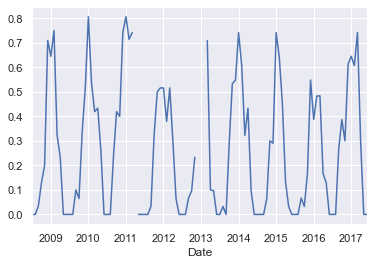

In [14]:
rain_series.resample("M").mean().plot();

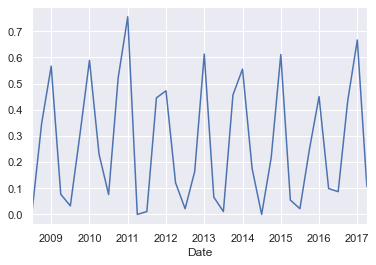

In [15]:
rain_series.resample("q").mean().plot();

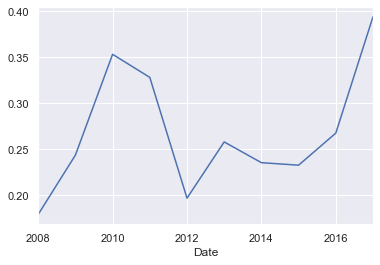

In [16]:
rain_series.resample("Y").mean().plot();

In [17]:
rain_series.groupby(by=rain_series.index.week).agg("mean")

C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13808\2406909224.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  rain_series.groupby(by=rain_series.index.week).agg("mean")


Date
1     0.596774
2     0.587302
3     0.682540
4     0.698413
5     0.666667
6     0.607143
7     0.535714
8     0.625000
9     0.474576
10    0.571429
11    0.682540
12    0.492063
13    0.433333
14    0.339286
15    0.392857
16    0.196429
17    0.122807
18    0.095238
19    0.015873
20    0.142857
21    0.047619
22    0.031746
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.015873
35    0.047619
36    0.031746
37    0.095238
38    0.047619
39    0.158730
40    0.174603
41    0.158730
42    0.238095
43    0.301587
44    0.158730
45    0.285714
46    0.444444
47    0.317460
48    0.295082
49    0.392857
50    0.589286
51    0.732143
52    0.553571
53    0.500000
Name: RainTomorrow, dtype: float64

Z drugiego wykresu możemy zauważyć, że w pierwszym kwartale każdego roku opady są zdecydowanie największe, mamy niemal 50% szans na opady deszczu. Opowiada to miesiącom od grudnia do marca. 
Dodatkowo można zauważyć, że od czerwca do sierpnia praktycznie nie pada.
Wprowadzę dodatkowe kolumny binarne określające tygodnie, w których są wysokie opady i brak opadów.

In [18]:
location_df["HeavyPrecipitationWeek"] = location_df.index.week.isin((*range(1, 13), *range(50,54)))
location_df["NoPrecipitationWeek"] = location_df.index.week.isin(range(22,35))

C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13808\3737573767.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  location_df["HeavyPrecipitationWeek"] = location_df.index.week.isin((*range(1, 13), *range(50,54)))
C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13808\3737573767.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  location_df["NoPrecipitationWeek"] = location_df.index.week.isin(range(22,35))


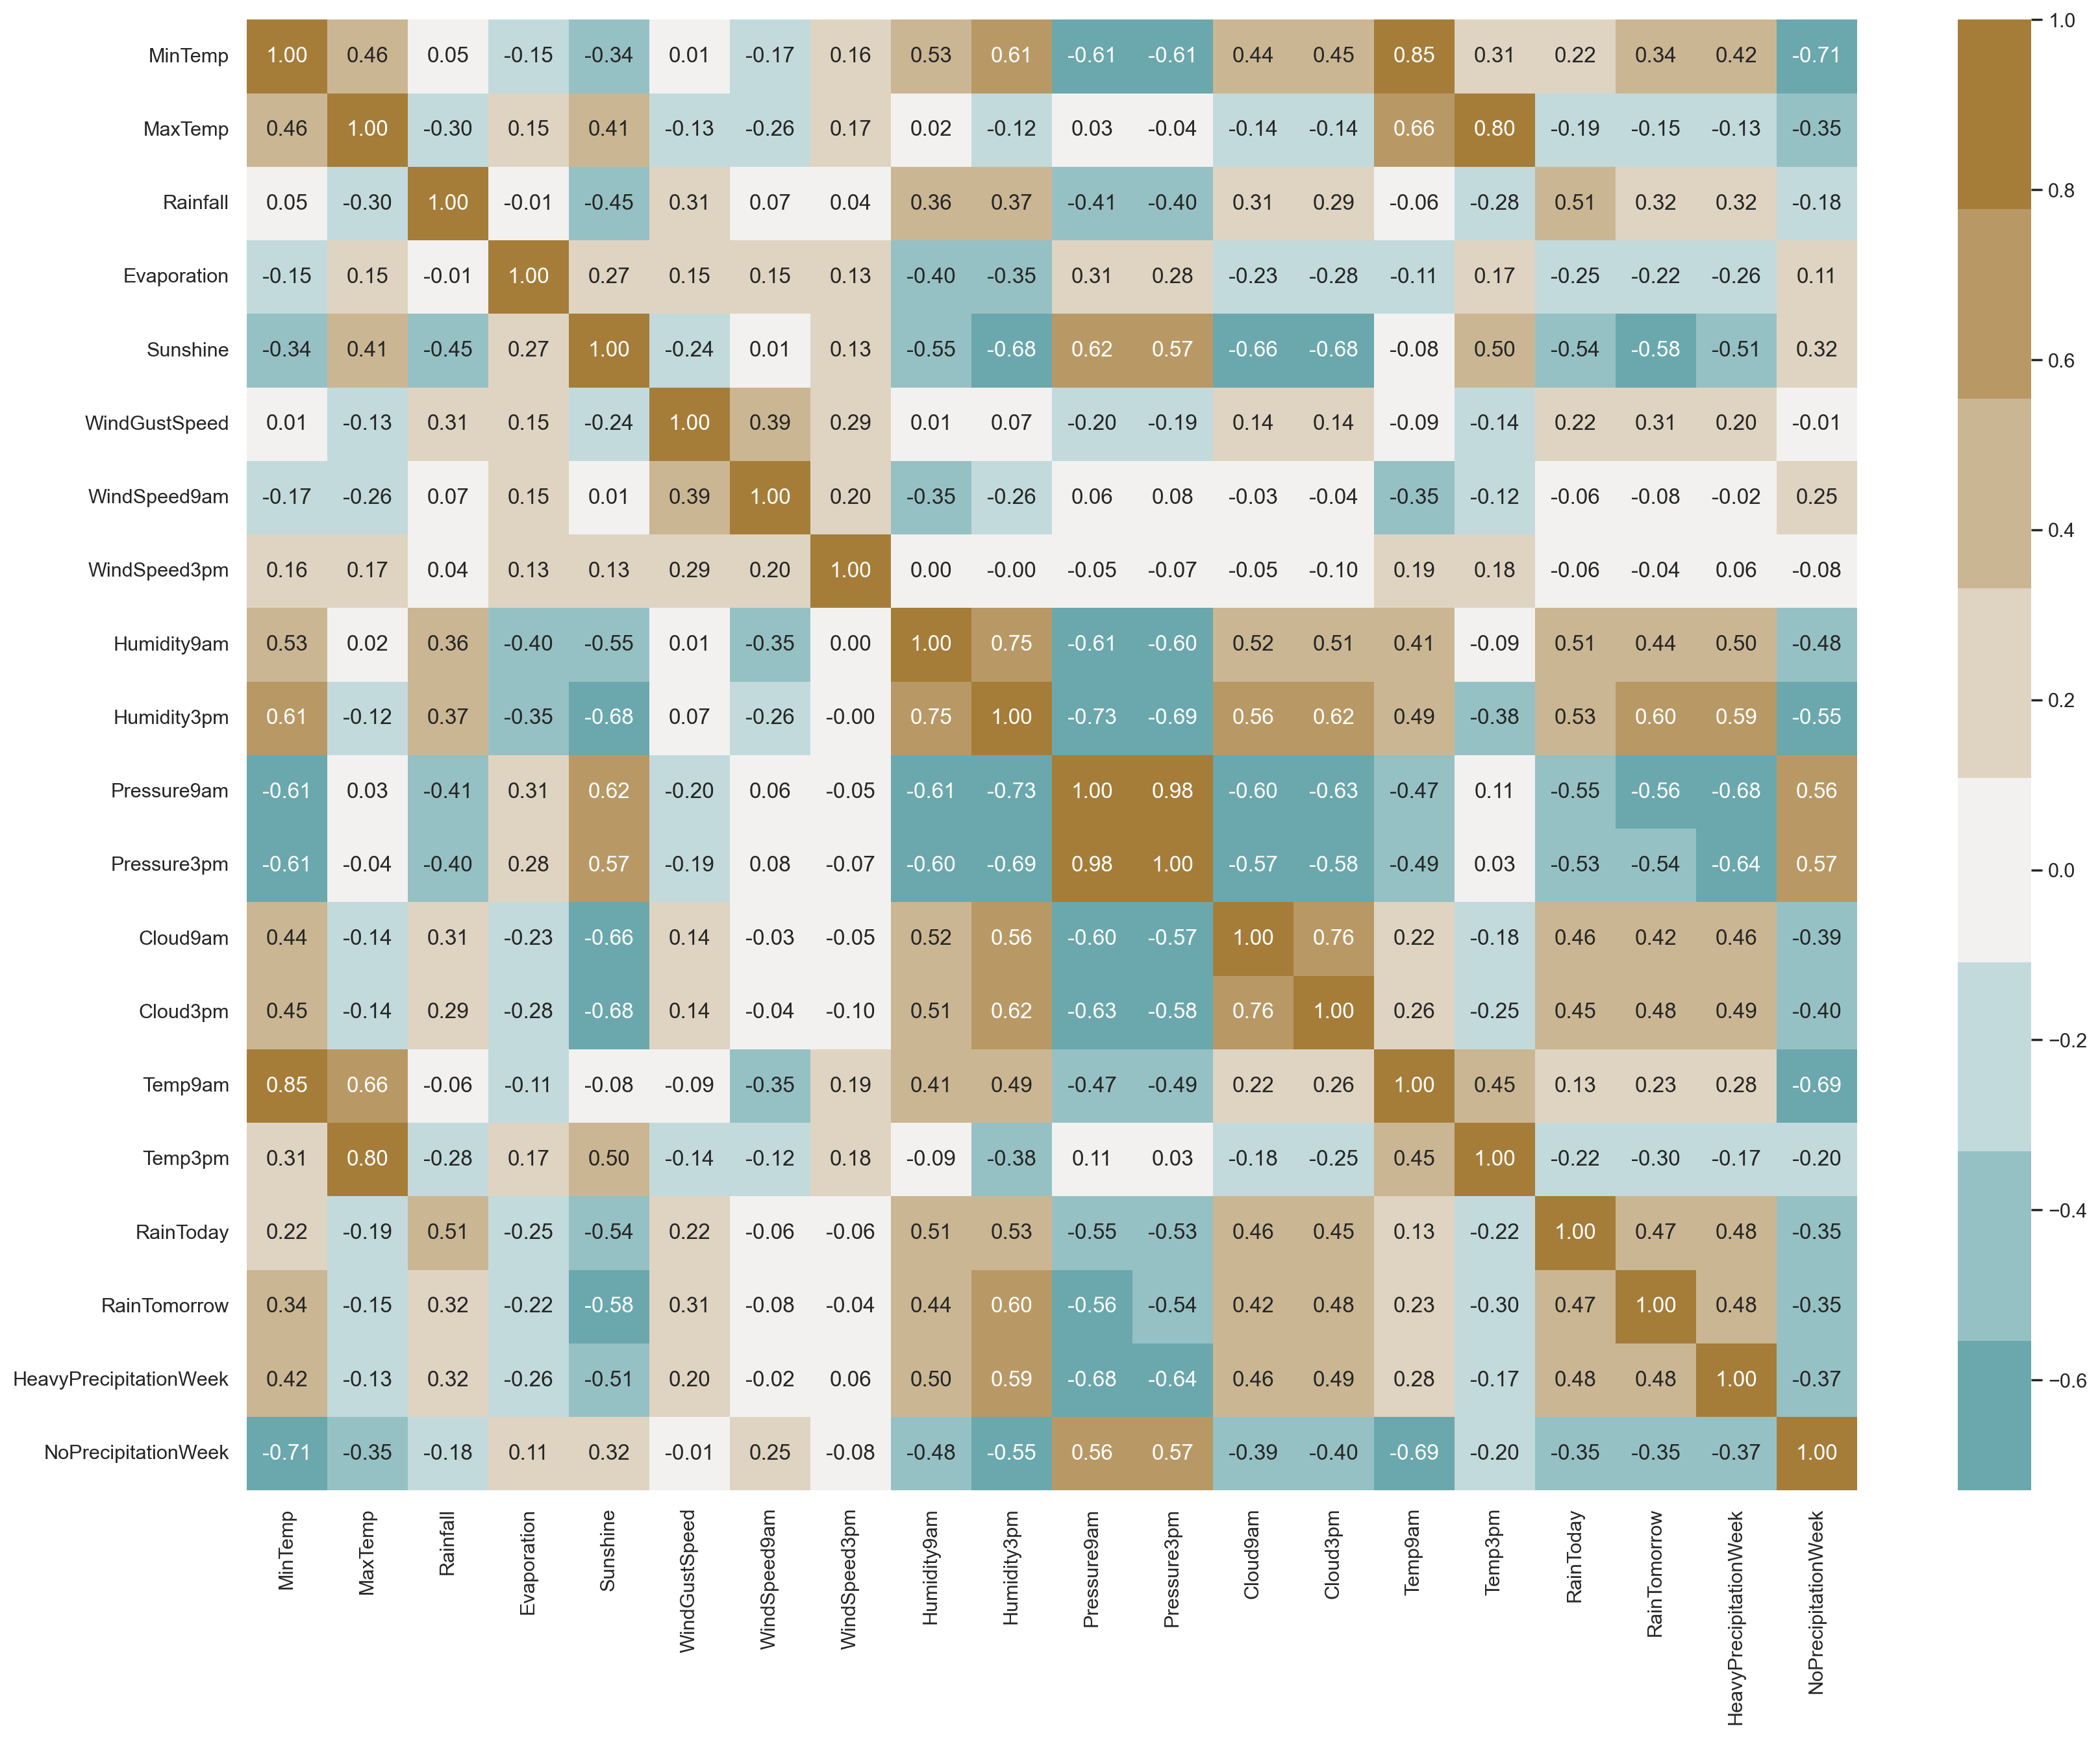

In [19]:
#korelacja zmiennych
plt.subplots(figsize=(20,15), dpi=200)
sns.heatmap(location_df.corr(), center=0, cmap=sns.diverging_palette(200, 55, s=80, l=55, n=9), annot=True, fmt='.2f');

### Czyszczenie brakujących wartości

Skrypt do sprawdzania brakujących wartości z https://practicaldatascience.co.uk/data-science/how-to-use-isna-to-check-for-missing-values-in-pandas-dataframes

In [20]:
location_df[location_df.isna().values]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,HeavyPrecipitationWeek,NoPrecipitationWeek
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-05,18.0,33.8,0.0,6.2,10.2,ESE,44.0,NaN,NW,0.0,...,1015.2,1011.3,3.0,1.0,25.2,28.3,False,False,False,True
2008-08-08,15.9,32.1,0.0,7.6,11.1,ESE,52.0,SE,E,19.0,...,1015.5,1012.0,0.0,0.0,21.4,31.9,False,False,False,True
2008-09-02,23.5,34.1,0.0,6.4,10.5,E,52.0,NaN,NW,0.0,...,1014.4,1010.8,4.0,5.0,27.0,30.0,False,False,False,False
2008-09-17,23.6,33.1,0.0,7.0,10.2,WNW,39.0,NaN,NW,0.0,...,1014.4,1010.8,3.0,1.0,28.8,30.6,False,False,False,False
2008-10-23,25.3,36.9,0.0,NaN,11.4,E,56.0,SSE,NNW,13.0,...,1011.6,1007.6,0.0,1.0,29.6,34.4,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-12,24.0,29.0,58.4,NaN,1.1,W,41.0,WSW,WNW,13.0,...,1008.0,1005.3,8.0,7.0,24.4,28.7,True,True,True,False
2017-02-27,24.2,33.7,49.2,NaN,10.8,ENE,33.0,S,WNW,7.0,...,1009.8,1006.1,2.0,5.0,28.0,32.5,True,True,True,False
2017-03-05,24.5,28.4,55.0,NaN,0.0,ESE,59.0,E,NNE,31.0,...,1002.7,1000.2,8.0,7.0,24.8,27.9,True,True,True,False


In [21]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output


In [22]:
show_missing(location_df)

,variable,dtype,count,unique,missing,pc_missing
0,MinTemp,float64,3192,159,1,0.03
1,MaxTemp,float64,3192,116,0,0.00
2,Rainfall,float64,3192,254,0,0.00
3,Evaporation,float64,3192,72,54,1.69
4,Sunshine,float64,3192,125,3,0.09
5,WindGustDir,object,3192,17,45,1.41
6,WindGustSpeed,float64,3192,47,41,1.28
7,WindDir9am,object,3192,17,28,0.88
8,WindDir3pm,object,3192,17,3,0.09
9,WindSpeed9am,float64,3192,28,2,0.06


In [23]:
100* location_df.isna().any(axis=1).sum() / len(location_df) 

4.072681704260652

Braki zachodzą w 4% wierszy. Mamy do czynienia z szeregiem czasowym, więc możemy użyć interpolacji do 
wypełnienia brakujących wartości. W tym celu użyjemy danych z dni poprzedzających. Wydaję mi się, że to lepsze rozwiązanie, niż mediana.

In [24]:
location_df = location_df.ffill()

In [25]:
show_missing(location_df)

,variable,dtype,count,unique,missing,pc_missing
0,MinTemp,float64,3192,158,0,0.0
1,MaxTemp,float64,3192,116,0,0.0
2,Rainfall,float64,3192,254,0,0.0
3,Evaporation,float64,3192,71,0,0.0
4,Sunshine,float64,3192,124,0,0.0
5,WindGustDir,object,3192,16,0,0.0
6,WindGustSpeed,float64,3192,46,0,0.0
7,WindDir9am,object,3192,16,0,0.0
8,WindDir3pm,object,3192,16,0,0.0
9,WindSpeed9am,float64,3192,27,0,0.0


### Dane odstające 

W tabeli widać wartości odstające dla opadów, parowania i prędkości wiatru.

In [26]:
location_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3192.0,23.211059,2.968314,12.5,21.6,23.9,25.3,29.7
MaxTemp,3192.0,32.540977,1.746054,21.9,31.6,32.8,33.7,38.0
Rainfall,3192.0,5.094048,16.452478,0.0,0.0,0.0,1.8,367.6
Evaporation,3192.0,6.318264,1.874104,0.2,5.2,6.4,7.6,19.2
Sunshine,3192.0,8.496241,3.210686,0.0,7.0,10.0,10.9,12.3
WindGustSpeed,3192.0,40.553258,10.007032,15.0,33.0,39.0,46.0,126.0
WindSpeed9am,3192.0,15.004386,6.884186,0.0,9.0,15.0,19.0,63.0
WindSpeed3pm,3192.0,20.835840,6.016742,0.0,17.0,20.0,24.0,52.0
Humidity9am,3192.0,68.475251,15.055356,11.0,62.0,71.0,78.0,99.0
Humidity3pm,3192.0,51.840852,18.703824,5.0,39.0,53.0,64.0,99.0


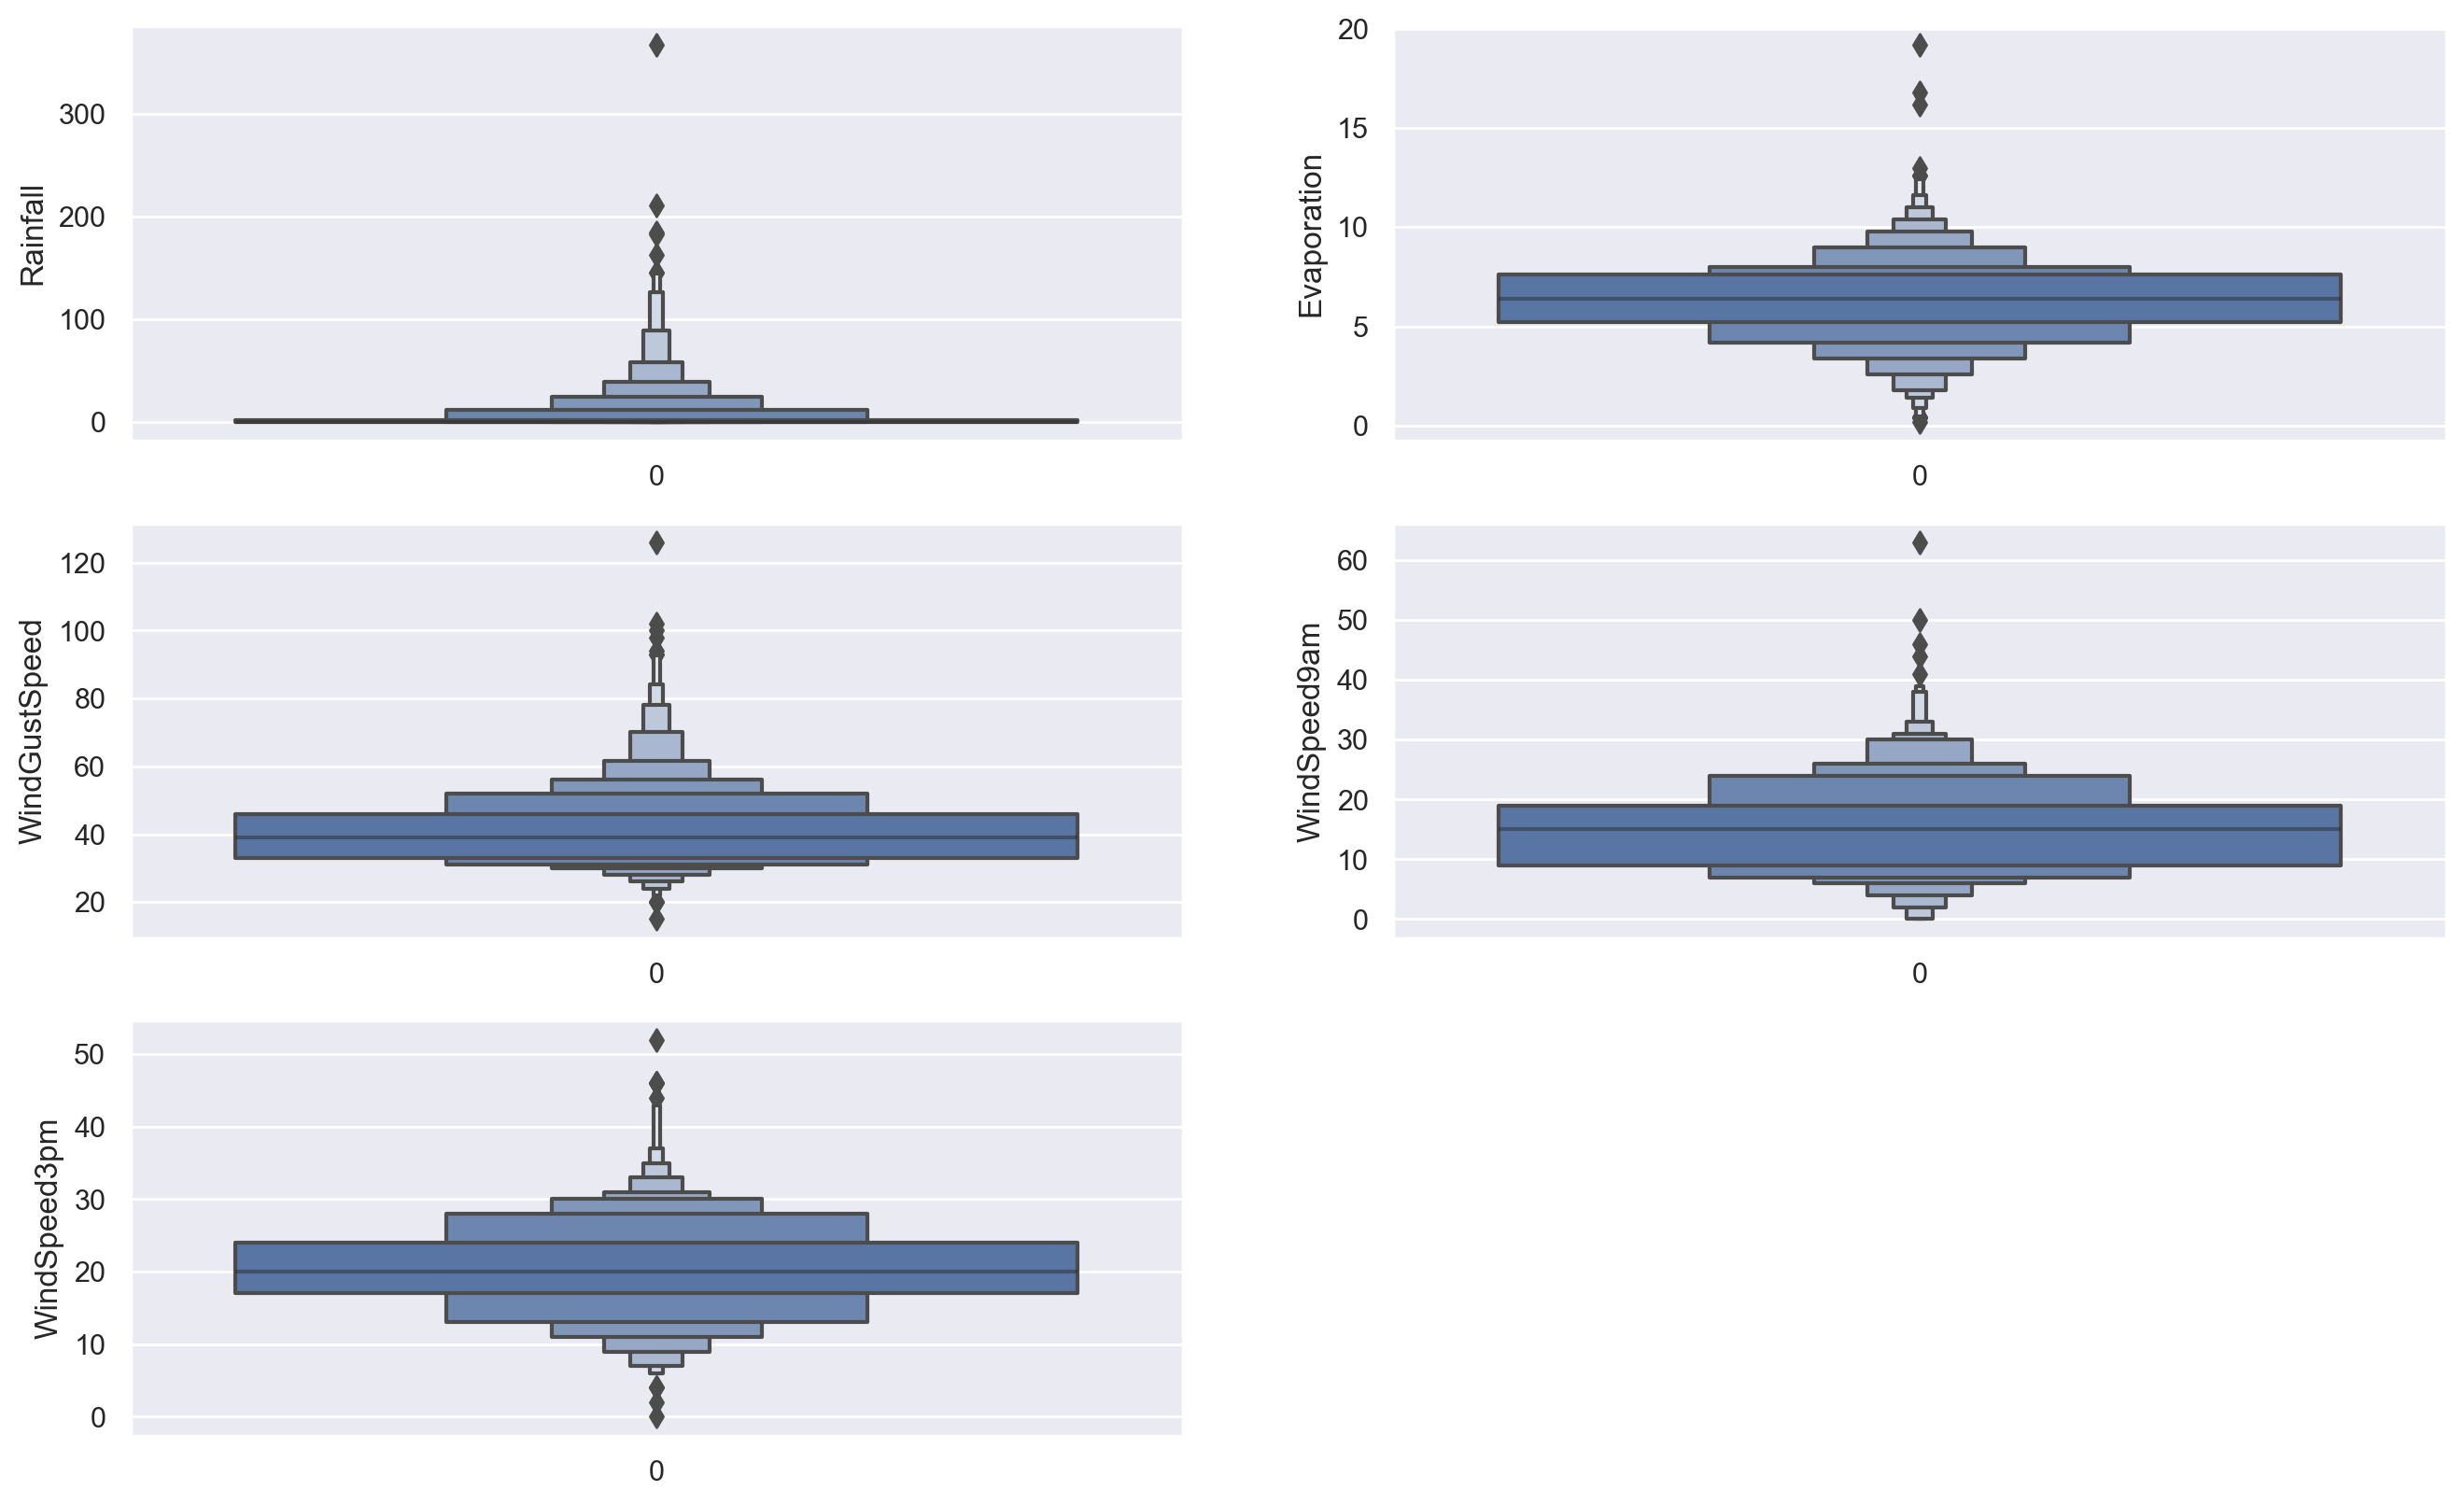

In [27]:
plt.figure(figsize=(16,10), dpi=200)
plt.subplot(3,2,1)
fig = sns.boxenplot(data=location_df.Rainfall)
fig.set_ylabel('Rainfall')
plt.subplot(3,2,2)
fig = sns.boxenplot(data=location_df.Evaporation)
fig.set_ylabel('Evaporation')
plt.subplot(3,2,3)
fig = sns.boxenplot(data=location_df.WindGustSpeed)
fig.set_ylabel('WindGustSpeed')
plt.subplot(3,2,4)
fig = sns.boxenplot(data=location_df.WindSpeed9am)
fig.set_ylabel('WindSpeed9am')
plt.subplot(3,2,5)
fig = sns.boxenplot(data=location_df.WindSpeed3pm)
fig.set_ylabel('WindSpeed3pm');

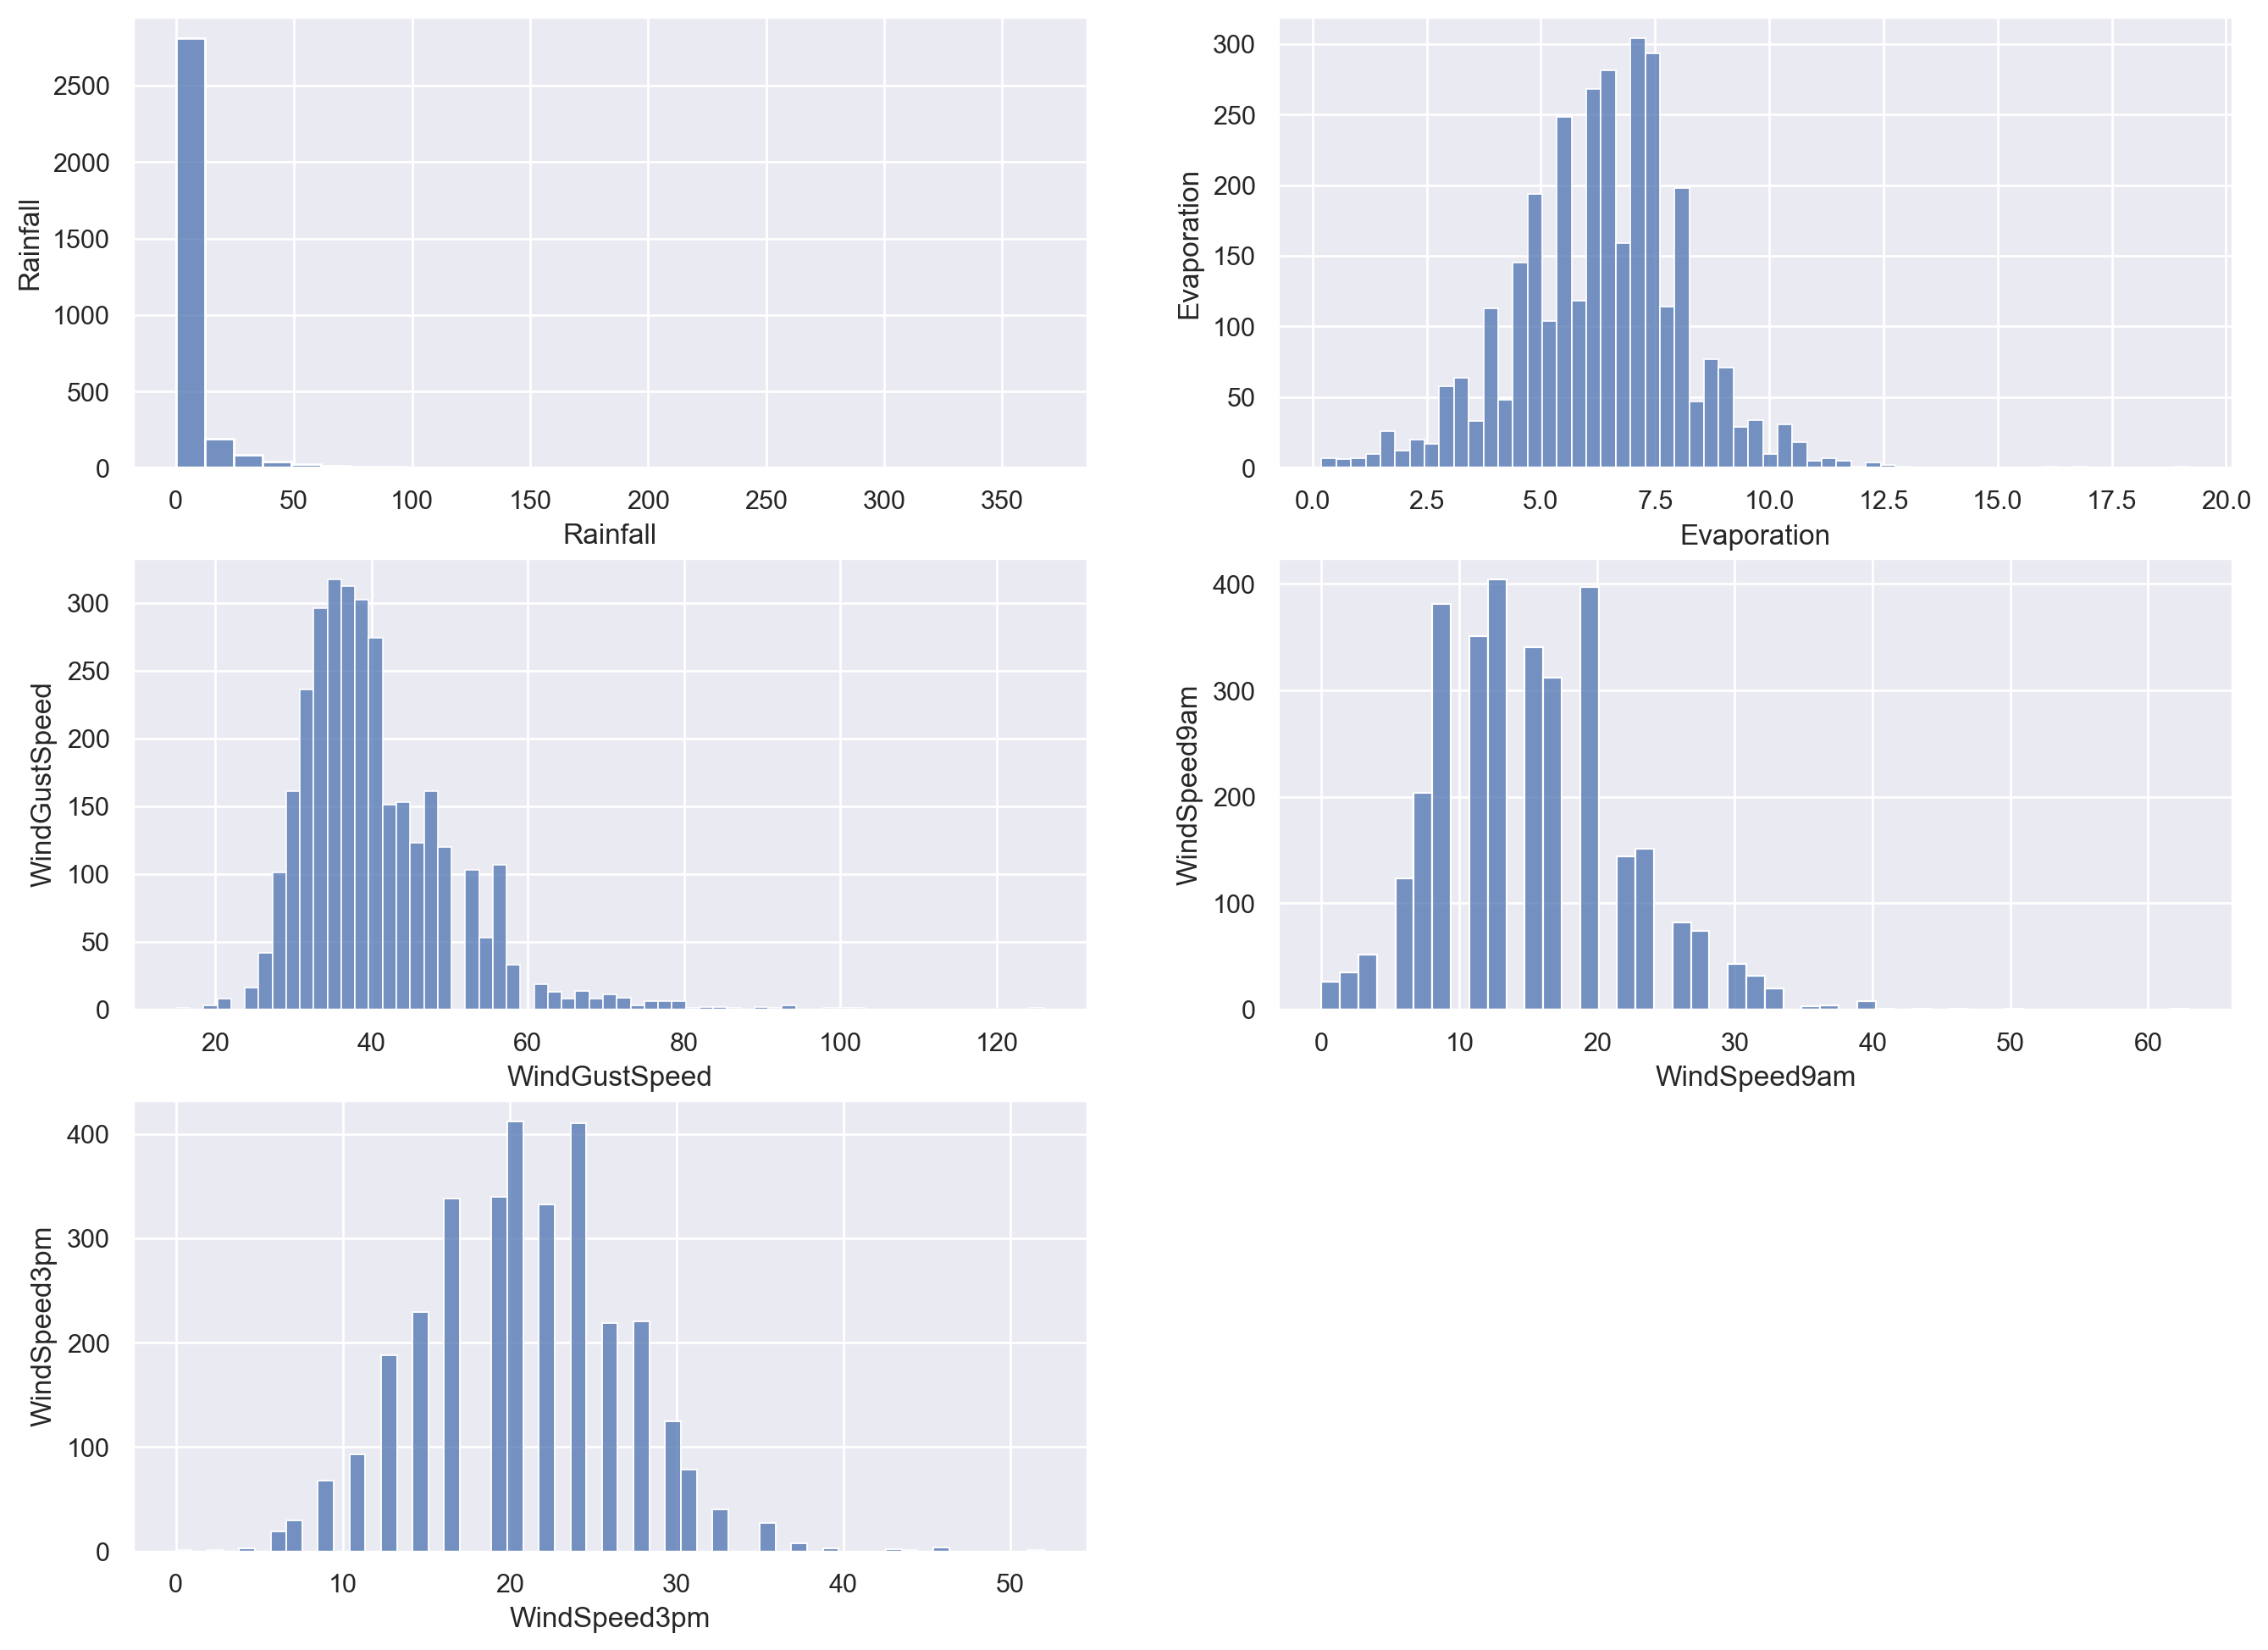

In [28]:
plt.figure(figsize=(16,12), dpi=200)
plt.subplot(3,2,1)
fig = sns.histplot(data=location_df.Rainfall, bins=30)
fig.set_ylabel('Rainfall')
plt.subplot(3,2,2)
fig = sns.histplot(data=location_df.Evaporation)
fig.set_ylabel('Evaporation')
plt.subplot(3,2,3)
fig = sns.histplot(data=location_df.WindGustSpeed)
fig.set_ylabel('WindGustSpeed')
plt.subplot(3,2,4)
fig = sns.histplot(data=location_df.WindSpeed9am)
fig.set_ylabel('WindSpeed9am')
plt.subplot(3,2,5)
fig = sns.histplot(data=location_df.WindSpeed3pm)
fig.set_ylabel('WindSpeed3pm');

Dla Rainfall jest aż 627 wartości odstających, nie możemy ich po prostu usunąć. Zamiast tego zastąpimy je wartościami krańcowymi.

In [29]:
for col in ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    IQR = location_df[col].quantile(0.75) - location_df[col].quantile(0.25)
    lower_range = location_df[col].quantile(0.25) - 1.5 * IQR
    upper_range = location_df[col].quantile(0.75) + 1.5 * IQR
    print(f"{col} odstające wartości: \
{location_df[~location_df[col].between(lower_range, upper_range)].shape[0]} \
IQR: {round(IQR, 2)}, \
dolna granica: {round(lower_range, 2)}, \
górna granica: {round(upper_range, 2)}")



Rainfall odstające wartości: 627 IQR: 1.8, dolna granica: -2.7, górna granica: 4.5
Evaporation odstające wartości: 66 IQR: 2.4, dolna granica: 1.6, górna granica: 11.2
WindGustSpeed odstające wartości: 79 IQR: 13.0, dolna granica: 13.5, górna granica: 65.5
WindSpeed9am odstające wartości: 20 IQR: 10.0, dolna granica: -6.0, górna granica: 34.0
WindSpeed3pm odstające wartości: 70 IQR: 7.0, dolna granica: 6.5, górna granica: 34.5


In [30]:
location_df["HeavyRainYesterday"] = location_df.Rainfall.apply(lambda x: x >= 4.5)

In [31]:
for col in ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    IQR = location_df[col].quantile(0.75) - location_df[col].quantile(0.25)
    lower_range = location_df[col].quantile(0.25) - 1.5 * IQR
    upper_range = location_df[col].quantile(0.75) + 1.5 * IQR
    location_df.loc[location_df[col] > upper_range, col] = upper_range
    location_df.loc[location_df[col] < lower_range, col] = max(lower_range, 0.)

In [32]:
location_df.Rainfall.ge(4.5).value_counts()

False    2565
True      627
Name: Rainfall, dtype: int64

### Zamiana klas kategorycznych w liczbowe, normalizacja i podział danych

In [33]:
location_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,HeavyPrecipitationWeek,NoPrecipitationWeek,HeavyRainYesterday
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-01,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,SSE,13.0,...,1012.1,1.0,2.0,25.4,32.3,False,False,False,True,False
2008-07-02,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,E,15.0,...,1012.4,1.0,1.0,24.3,31.9,False,False,False,True,False
2008-07-03,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,ENE,22.0,...,1013.0,0.0,1.0,24.3,31.2,False,False,False,True,False
2008-07-04,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,E,22.0,...,1013.6,2.0,6.0,21.3,29.8,False,False,False,True,False
2008-07-05,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,E,20.0,...,1012.6,1.0,1.0,22.2,29.6,False,False,False,True,False


In [34]:
location_df = pd.get_dummies(data=location_df, drop_first=True)

In [35]:
from sklearn.model_selection import train_test_split
X = location_df.drop(columns="RainTomorrow")
y = location_df.RainTomorrow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 3. Sposób rozwiązania problemu 
## Wykresy w sklearn wyglądają źle, dalsza część zadania została zrobiona w dataiku. Jest opisana w pliku pdf.
Krótki opis wybranego modelu wraz z uzasadnieniem
Etapy realizacji projektu
Miary ewaluacji (oceny jakości) modelu   
Zastosuję regresję logistyczną i random forest. Są to 2 podstawowe modele do klasyfikacji.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, RocCurveDisplay, roc_curve, roc_auc_score

In [38]:
log_model = LogisticRegression(random_state=101)
log_model.fit(scaled_X_train, y_train)
y_pred_log = log_model.predict(scaled_X_test)

In [39]:
forest_model = RandomForestClassifier(random_state=101, max_depth=6)
forest_model.fit(scaled_X_train, y_train)
y_pred_forest = forest_model.predict(scaled_X_test)

## 4. Dyskusja wyników i ewaluacja modelu
Wyniki modelowania
Ewaluacja modelu

In [40]:
y_pred_log1 = log_model.predict(scaled_X_train)
y_pred_forest1 = forest_model.predict(scaled_X_train)

In [41]:
print(f"Logistic Regression Accuracy:{round(accuracy_score(y_test, y_pred_log),4)}")
print(f"Random Forest Accuracy: {round(accuracy_score(y_test, y_pred_forest),4)}")

print(f"Logistic Regression Accuracy:{round(accuracy_score(y_train, y_pred_log1),4)}")
print(f"Random Forest Accuracy: {round(accuracy_score(y_train, y_pred_forest1),4)}")

Logistic Regression Accuracy:0.8717
Random Forest Accuracy: 0.8388
Logistic Regression Accuracy:0.8766
Random Forest Accuracy: 0.8864


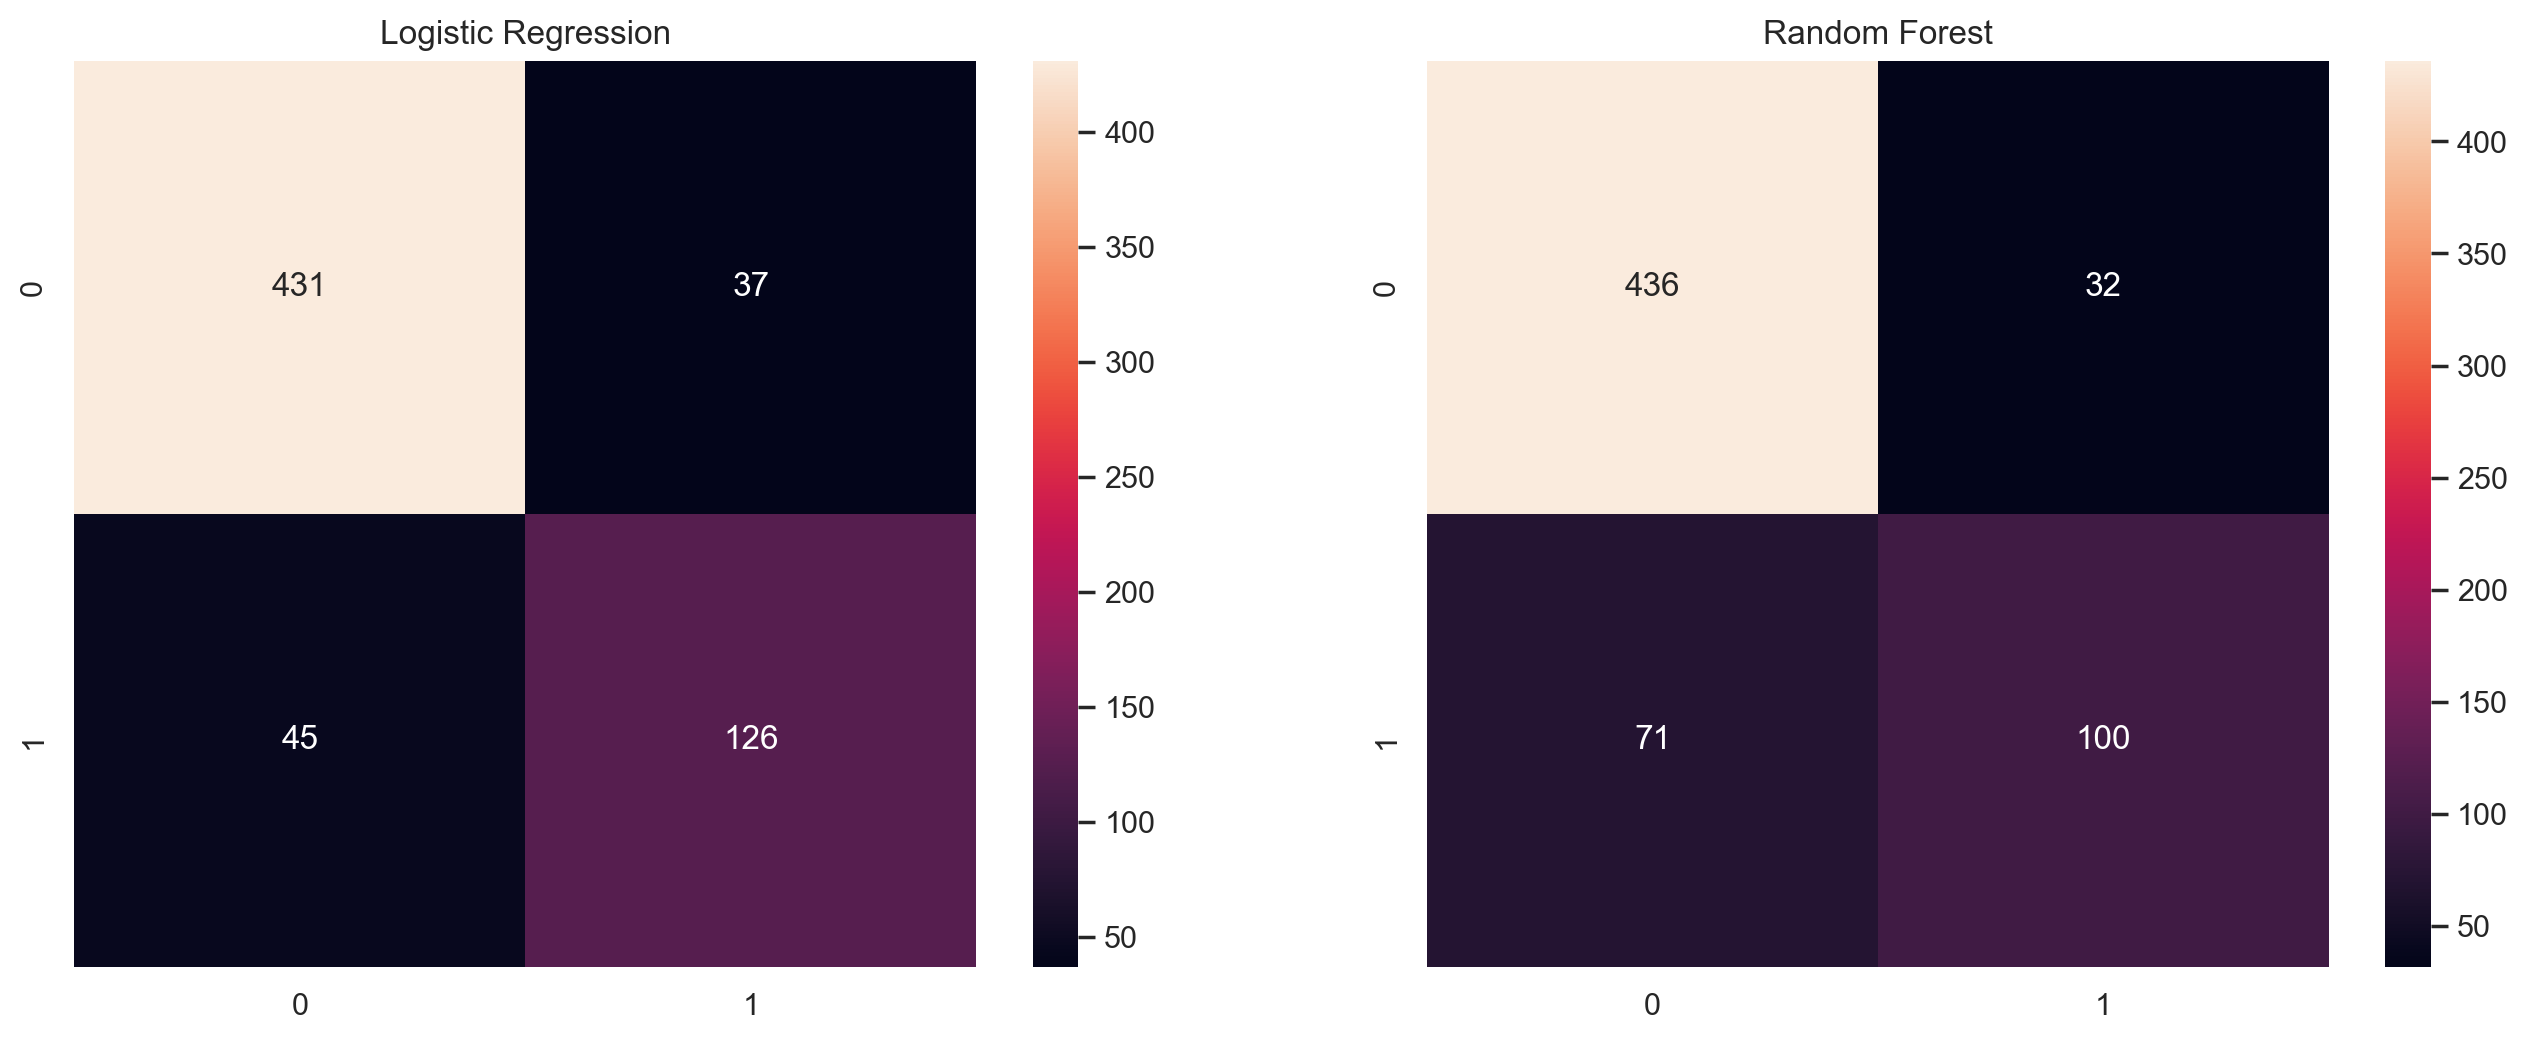

In [42]:
plt.figure(figsize=(16,6), dpi=200)
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot= True, fmt= 'g')
plt.title("Logistic Regression")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot= True, fmt= 'g')
plt.title("Random Forest");

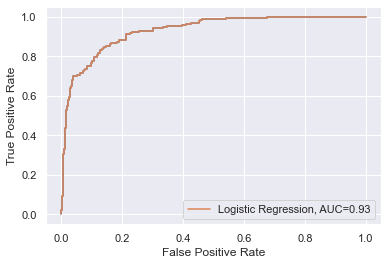

In [97]:
y_score = log_model.decision_function(scaled_X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 4)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot(fpr,tpr, label="Logistic Regression, AUC="+str(auc))
plt.legend();

In [44]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

       False       0.91      0.92      0.91       468
        True       0.77      0.74      0.75       171

    accuracy                           0.87       639
   macro avg       0.84      0.83      0.83       639
weighted avg       0.87      0.87      0.87       639



In [45]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

       False       0.86      0.93      0.89       468
        True       0.76      0.58      0.66       171

    accuracy                           0.84       639
   macro avg       0.81      0.76      0.78       639
weighted avg       0.83      0.84      0.83       639



In [98]:
feature_importance

,feature,importance
9,Humidity3pm,5.043495
10,Pressure9am,2.410975
5,WindGustSpeed,2.074619
14,Temp9am,2.017568
8,Humidity9am,1.466140
...,...,...
6,WindSpeed9am,0.863297
12,Cloud9am,0.746674
4,Sunshine,0.614190
18,NoPrecipitationWeek,0.366140


<Figure size 1152x720 with 0 Axes>

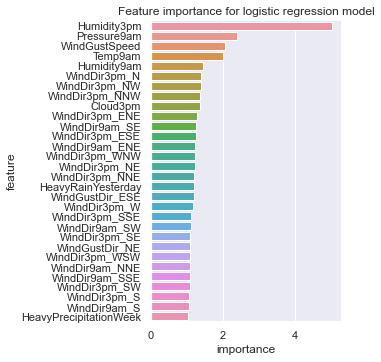

In [87]:
#kod z https://sefiks.com/2021/01/06/feature-importance-in-logistic-regression/
plt.figure(figsize=(16,10))
weights = log_model.coef_[0]
abs_weights = np.abs(weights)
feature_names = X.columns.values
import math
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, weights)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
plt.show()
sns.catplot(data=feature_importance[:30], y="feature", x="importance", kind="bar")
plt.title("Feature importance for logistic regression model")
plt.show()